<div style="text-align: center;">
    <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" alt="MNIST Examples" style="width: 70%; border-radius: 10px;"/>
</div>

<div style="text-align: center; margin-top: 20px;">
    <a href="https://github.com/Adityak8340"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a>
    <a href="https://www.linkedin.com/in/aditya-kumar-tiwari-a14547232/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a>
    <a href="https://web.facebook.com/adityakumar.tiwari.359778"><img src="https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook" alt="Facebook"/></a>
    <a href="mailto:adityak8340@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/></a>
</div>

<h1 style="text-align: center; font-size: 36px; color: #009688; margin-top: 20px;">🖊️ LeNet Architecture for Digit Recognition</h1>

<div style="text-align: center; margin-top: 20px;">
    <p style="font-size: 18px; font-style: italic; font-weight: bold;">LeNet-5, from the paper <a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" style="color: #009688; text-decoration: none;">Gradient-Based Learning Applied to Document Recognition</a>, is a very efficient convolutional neural network for handwritten character recognition.</p>
    <p style="font-size: 18px;"> <b>Authors</b> : Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner<br><b>Published in</b>: Proceedings of the IEEE (1998)</p>
</div>

---

### Structure of the LeNet network

LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models.

![lenet](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/lenet-5.png)

---

<div style="text-align: center; margin-top: 40px;">
    <h2 style="font-size: 24px; color: #007bff;">Steps:</h2>
    <ol style="font-size: 18px; text-align: left; margin: auto; width: 60%;">
        <li><b>Load and Preprocess:</b> Prepare the data for training.</li>
        <li><b>Define the Model:</b> Architect your LeNet model for digit recognition.</li>
        <li><b>Compile and Train:</b> Train your model to perfection.</li>
        <li><b>Evaluate Performance:</b> See how well your model performs.</li>
        <li><b>Visualize the Journey:</b> Dive deep into the training history.</li>
    </ol>
</div>

<div style="text-align: center; margin-top: 40px;">
    <p style="font-size: 18px;">Let's dive into the <b>LeNet-5</b> architecture and gain a solid understanding. </p>
</div>


# Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, AveragePooling2D, Flatten, Conv2D
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Step 2: Define the LeNet architecture

In [5]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second Convolutional Layer
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten layer to transition from convolutional to fully connected layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))

# Output Layer
model.add(Dense(10, activation='softmax'))

C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3: Compile the model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8189 - loss: 0.6435 - val_accuracy: 0.9511 - val_loss: 0.1600
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9557 - loss: 0.1453 - val_accuracy: 0.9713 - val_loss: 0.0939
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9723 - loss: 0.0919 - val_accuracy: 0.9762 - val_loss: 0.0725
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9796 - loss: 0.0652 - val_accuracy: 0.9788 - val_loss: 0.0650
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9845 - loss: 0.0504 - val_accuracy: 0.9834 - val_loss: 0.0542
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9870 - loss: 0.0420 - val_accuracy: 0.9838 - val_loss: 0.0513
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9867 - val_loss: 0.0445
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9914 - loss: 0.0279 - val_a

# Step 5: Visualize training history

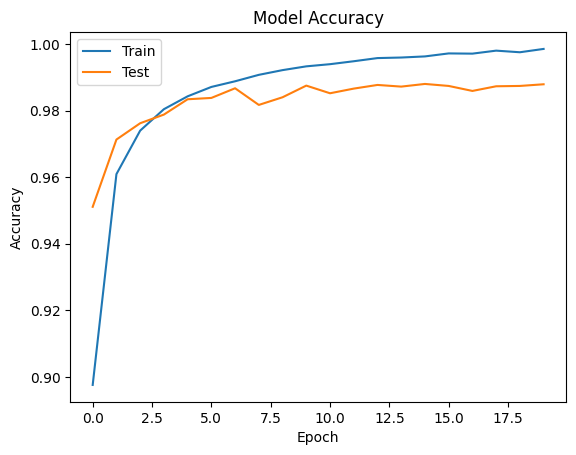

In [10]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

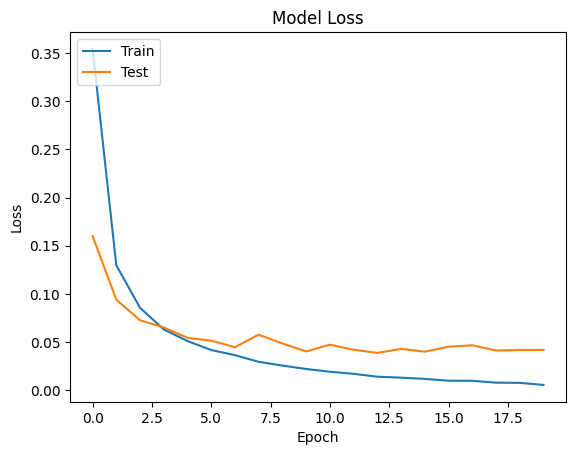

In [11]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()